In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [4]:
#load the dataset 

train_dir = 'C:/project_dataset/CNN/Training'
test_dir = 'C:/project_dataset/CNN/Testing'

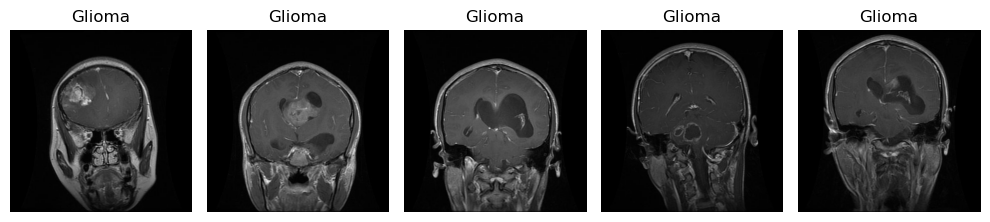

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your class folder (e.g., 'glioma')
class_folder = os.path.join(train_dir, 'glioma')  # Change to meningioma, no_tumor, etc.

# List the image files
image_files = os.listdir(class_folder)

# Plot 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(class_folder, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("Glioma")
    plt.axis('off')

plt.tight_layout()
plt.show()


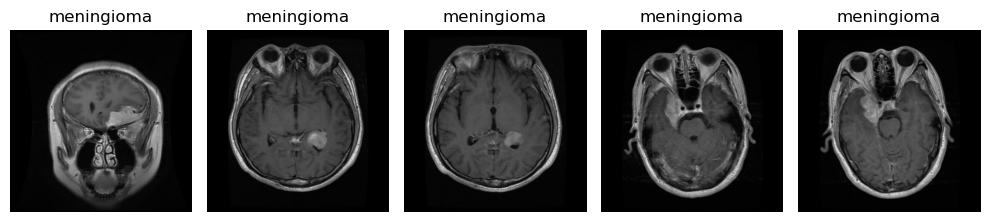

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your class folder (e.g., 'glioma')
class_folder = os.path.join(train_dir, 'meningioma')  # Change to meningioma, no_tumor, etc.

# List the image files
image_files = os.listdir(class_folder)

# Plot 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(class_folder, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("meningioma")
    plt.axis('off')

plt.tight_layout()
plt.show()


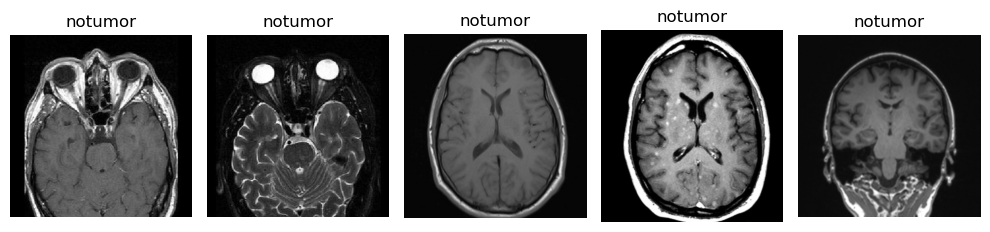

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your class folder (e.g., 'glioma')
class_folder = os.path.join(train_dir, 'notumor')  # Change to meningioma, no_tumor, etc.

# List the image files
image_files = os.listdir(class_folder)

# Plot 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(class_folder, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("notumor")
    plt.axis('off')

plt.tight_layout()
plt.show()


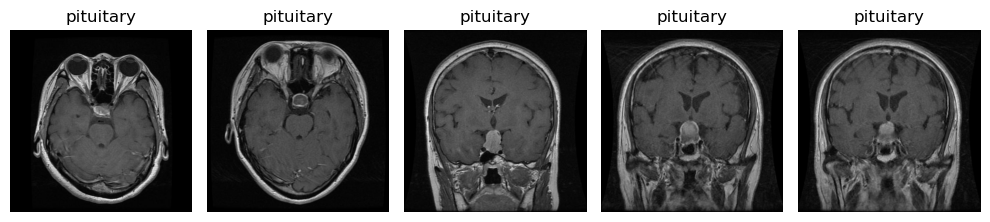

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set your class folder (e.g., 'glioma')
class_folder = os.path.join(train_dir, 'pituitary')  # Change to meningioma, no_tumor, etc.

# List the image files
image_files = os.listdir(class_folder)

# Plot 5 sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    img_path = os.path.join(class_folder, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("pituitary")
    plt.axis('off')

plt.tight_layout()
plt.show()


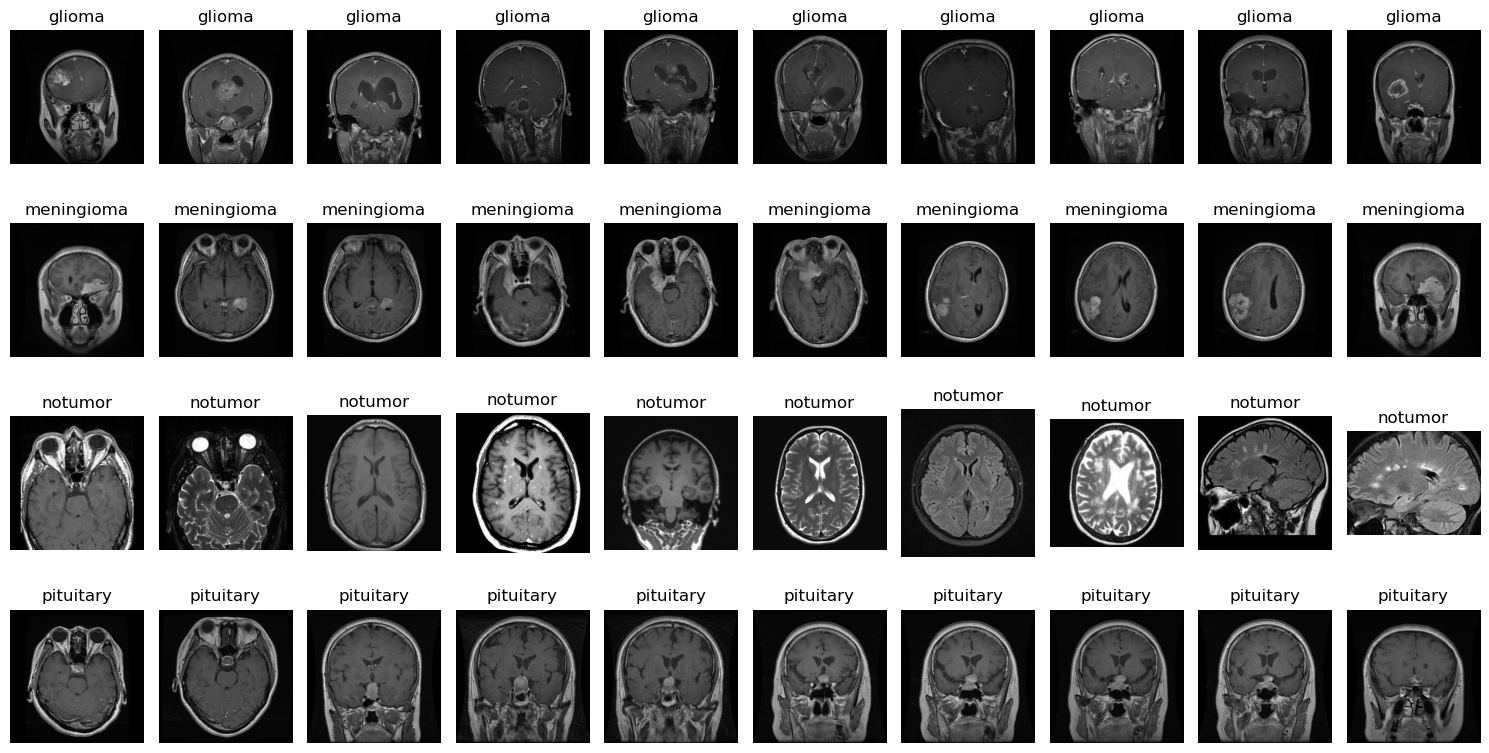

In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your training directory path
train_dir = 'C:/project_dataset/CNN/Training'

# Class names (should match folder names exactly)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Set number of images per class to show
images_per_class = 10

plt.figure(figsize=(15, 8))

# Loop through each class and plot images
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)

    for j in range(images_per_class):
        img_path = os.path.join(class_path, image_files[j])
        img = mpimg.imread(img_path)

        plt.subplot(len(class_names), images_per_class, i * images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'C:/project_dataset/CNN/Testing',  # your test dir
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [29]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.5989 - loss: 0.9260 - val_accuracy: 0.7620 - val_loss: 0.5332
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 220ms/step - accuracy: 0.8309 - loss: 0.4341 - val_accuracy: 0.8322 - val_loss: 0.4113
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - accuracy: 0.8951 - loss: 0.2895 - val_accuracy: 0.8741 - val_loss: 0.2989
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.9230 - loss: 0.2091 - val_accuracy: 0.9054 - val_loss: 0.2170
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.9510 - loss: 0.1374 - val_accuracy: 0.9291 - val_loss: 0.1904
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 214ms/step - accuracy: 0.9631 - loss: 0.1021 - val_accuracy: 0.9535 - val_loss: 0.1335
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.9702 - loss: 0.0884 - val_accuracy: 0.9664 - val_loss: 0.1194
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 213ms/step - accuracy: 0.9803 - loss: 0

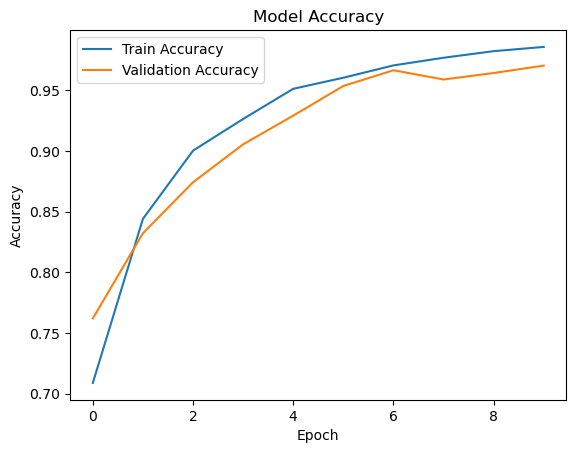

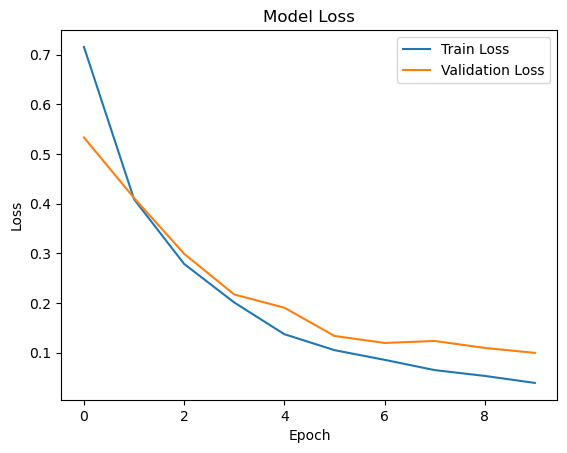

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
model.save('brain_tumor_model.h5')

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'C:/project_dataset/CNN/Testing/notumor/Te-no_0061.jpg'  # example test image
img = image.load_img(img_path, target_size=(128, 128))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_names = list(train_generator.class_indices.keys())
print("Predicted class:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted class: notumor


In [35]:
def predict_brain_tumor(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    print("Predicted class:", class_names[np.argmax(prediction)])



In [37]:
# Usage
predict_brain_tumor('C:/project_dataset/CNN/Testing/notumor/Te-no_0061.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: notumor


In [38]:
# Usage
# predict_brain_tumor('C:/project_dataset/CNN/Testing/glioma/Te-gl_0003.jpg')
predict_brain_tumor('C:/project_dataset/CNN/Testing/glioma/Te-gl_0111.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class: glioma
